In [1]:
#poetry add plotly
#poetry add nbformat

In [1]:
# Zelle 1: Imports und Setup
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
pio.renderers.default = "jupyterlab"

## Das biologische Neuron

In [3]:
print("hello world")

hello world


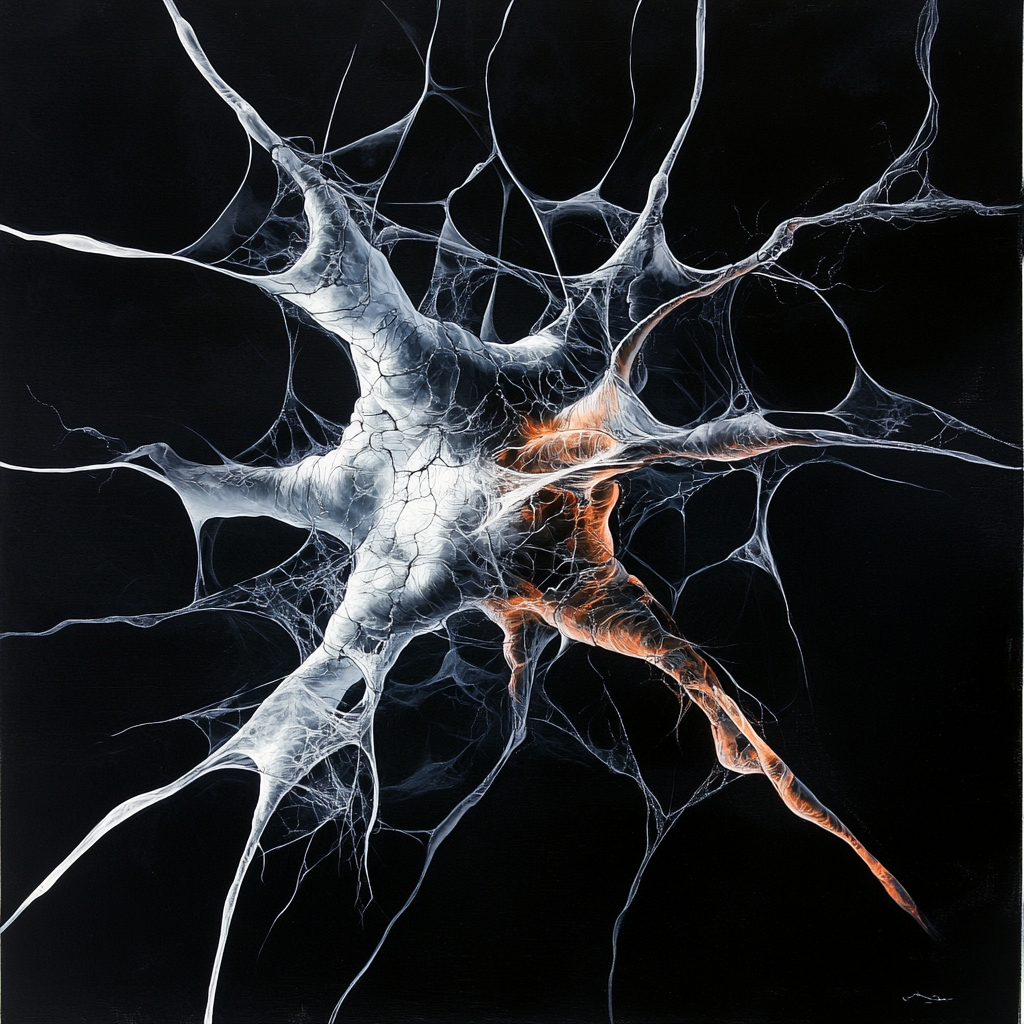

In [96]:
from IPython.display import Image, display

display(Image(filename='../images/neuron.png', width=512))

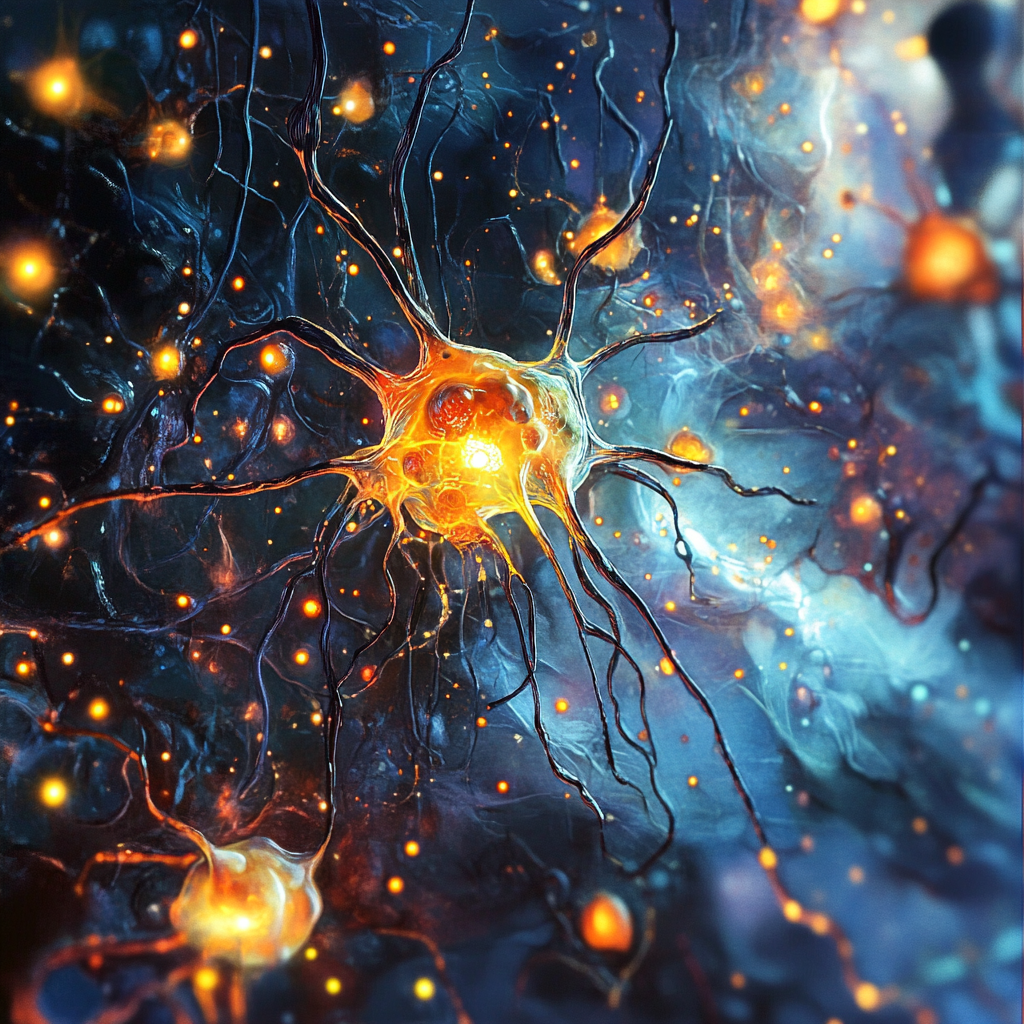

In [98]:
display(Image(filename='../images/neural_network.png', width=512))

## Das künstliche Neuron

In [6]:
import plotly.graph_objects as go
import numpy as np

# Konstanten
NODE_SIZE = dict(
    input=50,
    neuron=70,
    output=50
)
X_POSITIONS = dict(
    inputs=-2,
    neuron=0,
    output=2
)
COLORS = dict(
    input='rgba(173, 216, 230, 0.7)',  # helleres, transparenteres Blau
    neuron='rgba(144, 238, 144, 0.7)',  # helleres, transparenteres Grün
    output='rgba(250, 128, 114, 0.7)',  # helleres, transparenteres Lachs
    lines='rgba(128, 128, 128, 0.4)',   # transparenteres Grau
    bias='rgba(255, 218, 185, 0.7)'     # Pfirsich für Bias
)

fig = go.Figure()

# Input Neuronen (jetzt mit 4 Inputs inklusive Bias)
input_y = [-1.5, -0.5, 0.5, 1.5]  # Angepasste Y-Positionen für 4 Inputs

# Input Neuronen
for i, y in enumerate(input_y[:-1]):  # Alle außer letzter (Bias)
    fig.add_trace(go.Scatter(
        x=[X_POSITIONS['inputs']], 
        y=[y],
        mode='markers+text',
        marker=dict(
            size=NODE_SIZE['input'], 
            color=COLORS['input'],
            line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
        ),
        text=f'x{i}',
        textposition='middle center',
        name='Input' if i == 0 else None,
        showlegend=i == 0
    ))

# Bias Neuron (letzter Input)
fig.add_trace(go.Scatter(
    x=[X_POSITIONS['inputs']], 
    y=[input_y[-1]],
    mode='markers+text',
    marker=dict(
        size=NODE_SIZE['input'], 
        color=COLORS['bias'],
        line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
    ),
    text='1',  # Bias Input ist immer 1
    textposition='middle center',
    name='Bias'
))

# Neuron
fig.add_trace(go.Scatter(
    x=[X_POSITIONS['neuron']], 
    y=[0],
    mode='markers+text',
    marker=dict(
        size=NODE_SIZE['neuron'], 
        color=COLORS['neuron'],
        line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
    ),
    text='ReLU',
    textposition='middle right',
    name='Neuron'
))

# Output
fig.add_trace(go.Scatter(
    x=[X_POSITIONS['output']], 
    y=[0],
    mode='markers+text',
    marker=dict(
        size=NODE_SIZE['output'], 
        color=COLORS['output'],
        line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
    ),
    text='y',
    textposition='middle center',
    name='Output'
))

# Verbindungen mit Gewichten - jetzt mit Text in der Mitte der Linie
for i, y in enumerate(input_y):
    # Berechne Mittelpunkt der Linie für Gewichtstext
    x_mid = (X_POSITIONS['inputs'] + X_POSITIONS['neuron']) / 2
    y_mid = (y + 0) / 2  # Mitte zwischen Input und Neuron
    
    # Gewichtstext
    weight_text = 'b' if i == len(input_y)-1 else f'w{i}'
    
    # Linie
    fig.add_trace(go.Scatter(
        x=[X_POSITIONS['inputs']+0.2, X_POSITIONS['neuron']-0.2],
        y=[y, 0],
        mode='lines',
        line=dict(color=COLORS['lines'], width=2),
        showlegend=False
    ))
    
    # Separater Text-Trace für das Gewicht
    fig.add_trace(go.Scatter(
        x=[x_mid],
        y=[y_mid],
        mode='text',
        text=weight_text,
        textposition='middle center',
        showlegend=False
    ))

# Verbindung zum Output
fig.add_trace(go.Scatter(
    x=[X_POSITIONS['neuron']+0.2, X_POSITIONS['output']-0.2],
    y=[0, 0],
    mode='lines',
    line=dict(color=COLORS['lines'], width=2),
    showlegend=False
))

# Formel 
formula = 'y = ReLU(Σ wᵢxᵢ + b)'

fig.add_annotation(
    x=X_POSITIONS['neuron'], 
    y=2,
    text=formula,
    showarrow=False,
    font=dict(size=14, family='Computer Modern'),
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='rgba(0, 0, 0, 0.3)',
    borderwidth=1,
    borderpad=10
)

# Layout
fig.update_layout(
    title=dict(
        text='Einzelnes Neuron mit gewichteter Summe und ReLU Aktivierung',
        x=0.5,
        y=0.95,
        font=dict(size=16)
    ),
    showlegend=True,
    xaxis=dict(showticklabels=False, range=[-3.5, 3.5]),
    yaxis=dict(showticklabels=False, range=[-2.5, 3.5]),
    plot_bgcolor='white',
    width=1000,
    height=600,
    margin=dict(t=100, b=50)
)

fig.show()

## Aktivierungsfunktionen - Part I: eine Dimension

In [112]:
import numpy as np
import plotly.graph_objects as go

# Simulierte "Trainingsdaten": Gemessene Wachheit von Schülern
np.random.seed(42)  # Für reproduzierbare Ergebnisse
n_samples = 40

# Generiere realistische Trainingsdaten
times_early = np.random.uniform(5, 8, n_samples // 2)  # Frühe Morgenstunden
times_late = np.random.uniform(8, 12, n_samples // 2)   # Späte Morgenstunden

# Wachheitswerte (0 = schläft, 1 = wach)
# Früh: meist schlafend mit etwas Variation
wakefulness_early = np.random.normal(0.2, 0.1, n_samples // 2)
# Später: meist wach mit etwas Variation
wakefulness_late = np.random.normal(0.8, 0.1, n_samples // 2)

# Kombiniere die Daten
times_data = np.concatenate([times_early, times_late])
wakefulness_data = np.concatenate([wakefulness_early, wakefulness_late])

# Erstelle Plot
fig = go.Figure()

# Füge nur die Datenpunkte hinzu
fig.add_trace(
    go.Scatter(x=times_data, y=wakefulness_data,
               mode='markers',
               name='Gemessene Wachheit',
               marker=dict(size=10, color='blue', opacity=0.5))
)

# Update Layout
fig.update_layout(
    height=500,
    title_text="Gemessene Schüler-Wachheit zu verschiedenen Uhrzeiten",
    xaxis_title="Uhrzeit",
    yaxis_title="Wachheit (0=schläft, 1=wach)",
    xaxis=dict(range=[5, 12]),
    yaxis=dict(range=[-0.1, 1.1]),
    showlegend=True,
    hovermode='x unified'
)

fig.show()

In [113]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Simulierte "Trainingsdaten": Gemessene Wachheit von Schülern
np.random.seed(42)  # Für reproduzierbare Ergebnisse
n_samples = 40

# Generiere realistische Trainingsdaten
times_early = np.random.uniform(5, 8, n_samples // 2)  # Frühe Morgenstunden
times_late = np.random.uniform(8, 12, n_samples // 2)   # Späte Morgenstunden

# Wachheitswerte (0 = schläft, 1 = wach)
# Früh: meist schlafend mit etwas Variation
wakefulness_early = np.random.normal(0.2, 0.1, n_samples // 2)
# Später: meist wach mit etwas Variation
wakefulness_late = np.random.normal(0.8, 0.1, n_samples // 2)

# Kombiniere die Daten
times_data = np.concatenate([times_early, times_late])
wakefulness_data = np.concatenate([wakefulness_early, wakefulness_late])

# Glatte Kurve für die Aktivierungsfunktionen
times_smooth = np.linspace(5, 12, 100)

# Aktivierungsfunktionen
def relu_like(x):
    return np.clip((x - 8) / 4, 0, 1)  # Angepasste ReLU für diesen Wertebereich

def sigmoid_like(x):
    return 1 / (1 + np.exp(-(x - 8.5) * 2))  # Angepasste Sigmoid

# Erstelle Plot
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('ReLU-artige Aktivierung: "Harte Grenze"',
                                  'Sigmoid Aktivierung: "Sanfter Übergang"'))

# Plot für ReLU
fig.add_trace(
    go.Scatter(x=times_data, y=wakefulness_data,
               mode='markers',
               name='Gemessene Wachheit',
               marker=dict(size=10, color='blue', opacity=0.5)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=times_smooth, y=relu_like(times_smooth),
               name='ReLU Entscheidungsgrenze',
               line=dict(color='green', width=3)),
    row=1, col=1
)

# Plot für Sigmoid
fig.add_trace(
    go.Scatter(x=times_data, y=wakefulness_data,
               mode='markers',
               name='Gemessene Wachheit',
               marker=dict(size=10, color='blue', opacity=0.5),
               showlegend=False),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=times_smooth, y=sigmoid_like(times_smooth),
               name='Sigmoid Entscheidungsgrenze',
               line=dict(color='red', width=3)),
    row=1, col=2
)

# Update Layout
fig.update_layout(
    height=500,
    title_text="Neuron lernt: 'Ist der Schüler wach?' basierend auf der Uhrzeit",
    showlegend=True,
    hovermode='x unified'
)

# Update Achsen
for i in [1, 2]:
    fig.update_xaxes(title_text="Uhrzeit", range=[5, 12], row=1, col=i)
    fig.update_yaxes(title_text="Wachheit (0=schläft, 1=wach)", 
                     range=[-0.1, 1.1], row=1, col=i)

fig.show()

In [7]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np

x = np.linspace(-5, 5, 200)

relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('ReLU', 'Sigmoid', 'Tanh'))

fig.add_trace(
    go.Scatter(x=x, y=relu, name='ReLU', line=dict(color='#1f77b4')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x, y=sigmoid, name='Sigmoid', line=dict(color='#2ca02c')),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=x, y=tanh, name='Tanh', line=dict(color='#ff7f0e')),
    row=1, col=3
)

fig.update_layout(
    title_text="Aktivierungsfunktionen im Vergleich",
    showlegend=True,
    height=400,
    template='plotly_white',
    hovermode='x'
)

fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey')

fig.show()

## Aktivierungsfunktion Part II: 2 Dimensionen

In [116]:
import numpy as np
import plotly.graph_objects as go

# Dieselben Datenpunkte wie vorher
np.random.seed(42)  # Für reproduzierbare Ergebnisse
n_samples = 40

# Frühe und späte Zeiten wie im Original
times_early = np.random.uniform(5, 8, n_samples // 2)
times_late = np.random.uniform(8, 12, n_samples // 2)

# Wachheitswerte wie im Original
wakefulness_early = np.random.normal(0.2, 0.1, n_samples // 2)
wakefulness_late = np.random.normal(0.8, 0.1, n_samples // 2)

# Kombiniere die Zeit-Daten
times_data = np.concatenate([times_early, times_late])
wakefulness_data = np.concatenate([wakefulness_early, wakefulness_late])

# Generiere passende Schlafstunden
# Weniger Schlaf korreliert mit niedrigerer Wachheit
sleep_hours_early = np.random.normal(6, 0.5, n_samples // 2)  # Durchschnittlich 6 Stunden
sleep_hours_late = np.random.normal(8, 0.5, n_samples // 2)   # Durchschnittlich 8 Stunden
sleep_hours = np.concatenate([sleep_hours_early, sleep_hours_late])

# Erstelle 3D Plot
fig = go.Figure(data=[
    go.Scatter3d(
        x=times_data,
        y=sleep_hours,
        z=wakefulness_data,
        mode='markers',
        marker=dict(
            size=8,
            color=wakefulness_data,  # Farbe basierend auf Wachheit
            colorscale='RdYlGn',     # Rot zu Grün
            opacity=0.8,
            showscale=True,
            colorbar=dict(title="Wachheit")
        ),
        hovertemplate='Uhrzeit: %{x:.1f}<br>Schlaf: %{y:.1f}h<br>Wachheit: %{z:.2f}<extra></extra>'
    )
])

# Update Layout
fig.update_layout(
    height=800,
    title="3D: Schüler-Wachheit abhängig von Uhrzeit und Schlafstunden",
    scene=dict(
        xaxis_title="Uhrzeit",
        yaxis_title="Schlafstunden",
        zaxis_title="Wachheit",
        xaxis=dict(range=[5, 12]),
        yaxis=dict(range=[4, 10]),
        zaxis=dict(range=[0, 1]),
        # Setze die Kameraposition so, dass es der 2D-Ansicht ähnelt
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.2),
            up=dict(x=0, y=0, z=1)
        )
    ),
)

fig.show()

## Auswirkung der Aktivierungsfunktion an einem Bild gezeigt

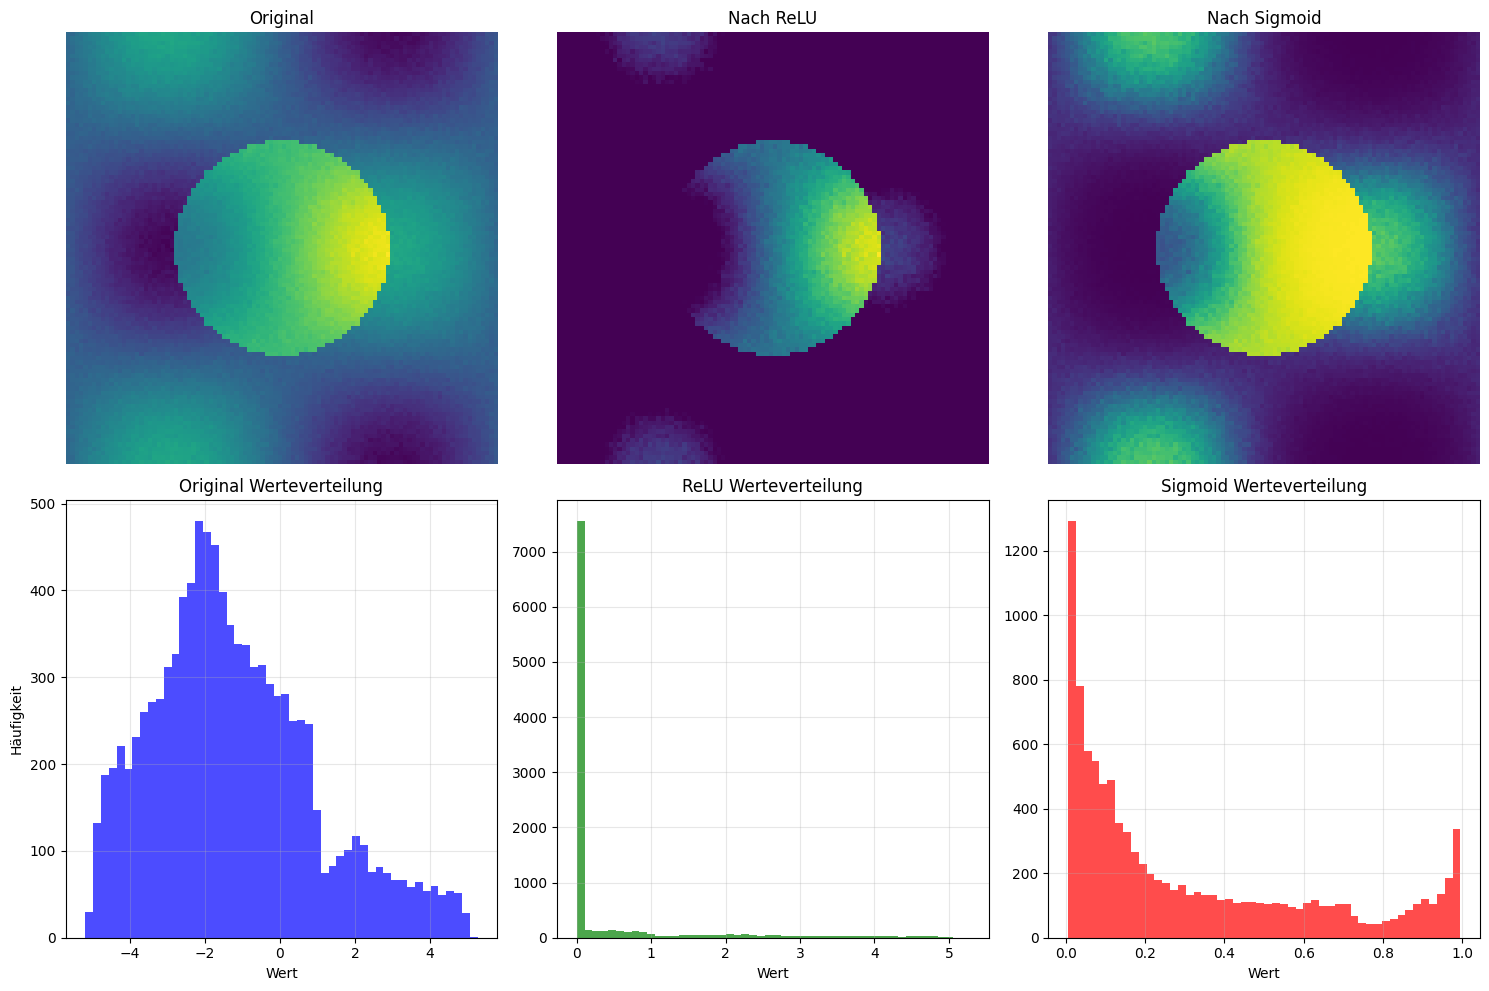

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ein kontrastreicheres Testbild erstellen
size = 100
x = np.linspace(-6, 6, size)
y = np.linspace(-6, 6, size)
X, Y = np.meshgrid(x, y)

# Erzeugen eines Musters mit stärkeren Kontrasten
image = np.zeros((size, size))
image += 3 * np.sin(X/2) * np.cos(Y/2)  # Grundmuster
image += 2 * (((X**2 + Y**2) < 9) * 2 - 1)  # Zentraler Kreis
image += np.random.normal(0, 0.1, (size, size))  # Leichtes Rauschen

# ReLU Aktivierungsfunktion
def relu(x):
    return np.maximum(0, x)

# Sigmoid Aktivierungsfunktion
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plot erstellen
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Erste Reihe: Bilder
axes[0,0].imshow(image, cmap='viridis')
axes[0,0].set_title('Original')
axes[0,0].axis('off')

axes[0,1].imshow(relu(image), cmap='viridis')
axes[0,1].set_title('Nach ReLU')
axes[0,1].axis('off')

axes[0,2].imshow(sigmoid(image), cmap='viridis')
axes[0,2].set_title('Nach Sigmoid')
axes[0,2].axis('off')

# Zweite Reihe: Histogramme
axes[1,0].hist(image.flatten(), bins=50, color='blue', alpha=0.7)
axes[1,0].set_title('Original Werteverteilung')
axes[1,0].set_xlabel('Wert')
axes[1,0].set_ylabel('Häufigkeit')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(relu(image).flatten(), bins=50, color='green', alpha=0.7)
axes[1,1].set_title('ReLU Werteverteilung')
axes[1,1].set_xlabel('Wert')
axes[1,1].grid(True, alpha=0.3)

axes[1,2].hist(sigmoid(image).flatten(), bins=50, color='red', alpha=0.7)
axes[1,2].set_title('Sigmoid Werteverteilung')
axes[1,2].set_xlabel('Wert')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Beispielberechnung

In [9]:
import plotly.graph_objects as go
import numpy as np

# Beispiel mit 3 Inputs
x = np.array([0.5, 0.8, 0.2])  # Input-Signale
w = np.array([0.4, 0.3, 0.8])  # Gewichte
b = 0.1                        # Bias

# Gewichtete Summe berechnen
z = np.sum(x * w) + b

# Visualisierung
fig = go.Figure()

# Positionen für die Visualisierung
y_positions = np.array([3, 2, 1])

# Input-Signale
fig.add_trace(go.Scatter(
    x=[0]*3, y=y_positions,
    mode='markers+text',
    marker=dict(size=40, color='lightblue'),
    text=[f'x₁={x[0]}', f'x₂={x[1]}', f'x₃={x[2]}'],
    name='Inputs'
))

# Gewichte als Beschriftung der Pfeile
for i in range(3):
    fig.add_annotation(
        x=0.5, y=y_positions[i],
        text=f'w{i+1}={w[i]}',
        showarrow=False,
        yshift=20
    )

# Pfeile von Inputs zum Neuron
for i in range(3):
    fig.add_trace(go.Scatter(
        x=[0, 1], y=[y_positions[i], 2],
        mode='lines+text',
        line=dict(width=1),
        showlegend=False
    ))

# Neuron (Summe)
fig.add_trace(go.Scatter(
    x=[1], y=[2],
    mode='markers+text',
    marker=dict(size=60, color='lightgreen'),
    text=f'Σ = {z:.2f}',
    name='Gewichtete\nSumme'
))

# Bias
fig.add_annotation(
    x=1, y=2.5,
    text=f'+ Bias ({b})',
    showarrow=False
)

# Aktivierungsfunktion (ReLU als Beispiel)
fig.add_trace(go.Scatter(
    x=[2], y=[2],
    mode='markers+text',
    marker=dict(size=60, color='salmon'),
    text=f'ReLU\n{max(0, z):.2f}',
    name='Aktivierung'
))

# Pfeil zur Aktivierung
fig.add_trace(go.Scatter(
    x=[1.3, 1.7], y=[2, 2],
    mode='lines+text',
    line=dict(width=1),
    showlegend=False
))

# Layout anpassen
fig.update_layout(
    title='Verarbeitung in einem Neuron',
    showlegend=True,
    xaxis=dict(showticklabels=False, range=[-0.5, 2.5]),
    yaxis=dict(showticklabels=False, range=[0, 4]),
    plot_bgcolor='white'
)

fig.show()

In [10]:
#!poetry add ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [2]:
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider
import numpy as np

def visualize_neuron(w1, w2, w3, x1=0.5, x2=0.5, x3=0.5, bias=0.0):
    # Berechnung
    weighted_sum = w1*x1 + w2*x2 + w3*x3 + bias
    output = max(0, weighted_sum)  # ReLU
    
    # Visualisierung
    fig = go.Figure()
    
    # Konstanten
    NODE_SIZE = dict(input=40, neuron=50, output=40)
    X_POSITIONS = dict(inputs=-2, neuron=0, output=2)
    COLORS = dict(
        input='rgba(173, 216, 230, 0.7)',
        neuron='rgba(144, 238, 144, 0.7)',
        output='rgba(250, 128, 114, 0.7)',
        lines='rgba(128, 128, 128, 0.4)'
    )
    
    # Input Neuronen
    input_y = [-1, 0, 1]
    input_values = [x1, x2, x3]
    
    # Input Neuronen
    fig.add_trace(go.Scatter(
        x=[X_POSITIONS['inputs']]*3, 
        y=input_y,
        mode='markers+text',
        marker=dict(
            size=NODE_SIZE['input'], 
            color=COLORS['input'],
            line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
        ),
        text=[f'x₁={x1:.1f}', f'x₂={x2:.1f}', f'x₃={x3:.1f}'],
        textposition='middle right',
        name='Inputs'
    ))
    
    # Neuron
    fig.add_trace(go.Scatter(
        x=[X_POSITIONS['neuron']], 
        y=[0],
        mode='markers+text',
        marker=dict(
            size=NODE_SIZE['neuron'], 
            color=COLORS['neuron'],
            line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
        ),
        text=f'Σ={weighted_sum:.2f}',
        textposition='middle right',
        name='Neuron'
    ))
    
    # Output
    fig.add_trace(go.Scatter(
        x=[X_POSITIONS['output']], 
        y=[0],
        mode='markers+text',
        marker=dict(
            size=NODE_SIZE['output'], 
            color=COLORS['output'],
            line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
        ),
        text=f'y={output:.2f}',
        textposition='middle right',
        name='Output'
    ))
    
    # Verbindungen mit Gewichten
    weights = [w1, w2, w3]
    for i, (y, w) in enumerate(zip(input_y, weights)):
        # Farbe basierend auf Gewichtswert
        if w > 0:
            line_color = f'rgba(0, 255, 0, {min(abs(w)/5, 0.7)})'  # Grün für positive
        else:
            line_color = f'rgba(255, 0, 0, {min(abs(w)/5, 0.7)})'  # Rot für negative
            
        fig.add_trace(go.Scatter(
            x=[X_POSITIONS['inputs']+0.2, X_POSITIONS['neuron']-0.2],
            y=[y, 0],
            mode='lines+text',
            text=f'w{i+1}={w:.1f}',
            textposition='middle center',
            line=dict(color=line_color, width=2+abs(w)),
            showlegend=False
        ))
    
    # Verbindung zum Output
    fig.add_trace(go.Scatter(
        x=[X_POSITIONS['neuron']+0.2, X_POSITIONS['output']-0.2],
        y=[0, 0],
        mode='lines',
        line=dict(color=COLORS['lines'], width=2),
        showlegend=False
    ))
    
    # Layout
    fig.update_layout(
        title='Interaktives Neuron: Gewichte und Aktivierung',
        showlegend=True,
        xaxis=dict(showticklabels=False, range=[-3.5, 3.5]),
        yaxis=dict(showticklabels=False, range=[-2.5, 2.5]),
        plot_bgcolor='white',
        width=800,
        height=500
    )
    
    fig.show()
    
    
# Interaktive Steuerelemente
interact(visualize_neuron,
         w1=FloatSlider(min=-5, max=5, step=0.1, value=1),
         w2=FloatSlider(min=-5, max=5, step=0.1, value=1),
         w3=FloatSlider(min=-5, max=5, step=0.1, value=1),
         x1=FloatSlider(min=-2, max=2, step=0.1, value=0.5),
         x2=FloatSlider(min=-2, max=2, step=0.1, value=0.5),
         x3=FloatSlider(min=-2, max=2, step=0.1, value=0.5),
         bias=FloatSlider(min=-5, max=5, step=0.1, value=0))


interactive(children=(FloatSlider(value=1.0, description='w1', max=5.0, min=-5.0), FloatSlider(value=1.0, desc…

<function __main__.visualize_neuron(w1, w2, w3, x1=0.5, x2=0.5, x3=0.5, bias=0.0)>

## das XOR Problem

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Create figure with two subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=(
    'Linear separierbare Punkte',
    'XOR Problem: Nicht linear separierbar'
))

# Erste Gruppe (unter der Trennlinie x + y = 1, also x + y < 1)
x0_linear = [0.2, 0.3, 0.4, 0.3, 0.5, 0.2, 0.4, 0.3, 0.6, 0.4]
x1_linear = [0.3, 0.2, 0.3, 0.4, 0.2, 0.5, 0.3, 0.4, 0.2, 0.3]
# Prüfen: alle Punkte erfüllen x + y < 1

# Zweite Gruppe (über der Trennlinie x + y = 1, also x + y > 1)
x0_linear.extend([1.0, 0.3, 1.1, 0.4, 1.2, 1.0, 1.3, 1.1, 0.9, 1.2])
x1_linear.extend([0.8, 1.0, 0.9, 1.1, 0.8, 1.2, 0.9, 1.0, 0.2, 0.9])
# Prüfen: alle Punkte erfüllen x + y > 1

# Ein paar Punkte näher an (aber nicht auf) der Trennlinie
x0_linear.extend([0.7, 0.6, 0.8])
x1_linear.extend([0.2, 0.3, 0.1])  # unter der Linie
# Prüfen: auch diese Punkte haben Abstand zur Trennlinie

# Labels erstellen
y_linear = [0]*10 + [1]*10 + [0, 0, 0]

# Farben basierend auf Labels
colors_linear = ['blue' if yi == 0 else 'red' for yi in y_linear]

# Add points for linear separable case
fig.add_trace(
    go.Scatter(
        x=x0_linear,
        y=x1_linear,
        mode='markers',
        marker=dict(
            size=15,
            color=colors_linear,
            symbol='circle',
            line=dict(color='black', width=1)
        ),
        name='Klasse 0/1',
        showlegend=False
    ),
    row=1, col=1
)

# Add decision boundary for linear case
x_line = np.linspace(-0.2, 1.2, 100)
y_line = -x_line + 1  # Trennlinie: y = -x + 1 (oder x + y = 1)

fig.add_trace(
    go.Scatter(
        x=x_line,
        y=y_line,
        mode='lines',
        line=dict(color='black', dash='dash', width=2),
        name='Trennlinie',
        showlegend=False
    ),
    row=1, col=1
)

# Add formula annotation
fig.add_annotation(
    x=0.3,
    y=-0.3,
    text="w₁x + w₂y + b = 0<br>mit w₁=1, w₂=1, b=-1<br>→ x + y - 1 = 0",
    showarrow=False,
    xref="x",
    yref="y",
    font=dict(size=12),
    bgcolor="white",
    bordercolor="black",
    borderwidth=1,
    row=1,
    col=1
)

# XOR Problem - using exact coordinates
x0_xor = [0, 0, 1, 1]
x1_xor = [0, 1, 0, 1]
y_xor = [0, 1, 1, 0]
colors_xor = ['blue' if yi == 0 else 'red' for yi in y_xor]

# Add points for XOR
fig.add_trace(
    go.Scatter(
        x=x0_xor,
        y=x1_xor,
        mode='markers+text',
        marker=dict(
            size=15,
            color=colors_xor,
            symbol='circle',
            line=dict(color='black', width=1)
        ),
        text=['y=0', 'y=1', 'y=1', 'y=0'],
        textposition="top center",
        name='XOR Punkte',
        showlegend=False
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text="Lineare Separierbarkeit vs. XOR Problem",
    height=500,
    width=1000,
    showlegend=False,
    plot_bgcolor='white'
)

# Update axes with cleaner look
for i in [1, 2]:
    fig.update_xaxes(
        range=[-0.5, 1.5],
        title_text="x",
        row=1,
        col=i,
        gridcolor='lightgrey',
        gridwidth=1,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='black',
        showline=True,
        linewidth=1,
        linecolor='lightgrey',
        mirror=False  # Remove top axis line
    )
    fig.update_yaxes(
        range=[-0.5, 1.5],
        title_text="y",
        row=1,
        col=i,
        gridcolor='lightgrey',
        gridwidth=1,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='black',
        showline=True,
        linewidth=1,
        linecolor='lightgrey',
        mirror=False  # Remove right axis line
    )

fig.show()

## Layer FTW

In [18]:
import plotly.graph_objects as go
import numpy as np

def create_neural_net_plotly(n_inputs=3, n_hidden=4, n_outputs=2):
    # Positionen der Neuronen
    layers = [n_inputs, n_hidden, n_outputs]
    layer_spacing = 1
    neuron_spacing = 1
    
    # Knoten erstellen
    nodes_x = []
    nodes_y = []
    nodes_text = []
    nodes_color = []
    
    for i, layer_size in enumerate(layers):
        for j in range(layer_size):
            nodes_x.append(i * layer_spacing)
            nodes_y.append(j * neuron_spacing - (layer_size-1) * neuron_spacing/2)
            nodes_text.append(f'Layer {i}, Neuron {j}')
            nodes_color.append(['lightblue', 'lightgreen', 'salmon'][i])
    
    # Kanten erstellen
    edges_x = []
    edges_y = []
    
    node_indices = np.cumsum([0] + layers)
    
    for i in range(len(layers)-1):
        for j in range(layers[i]):
            for k in range(layers[i+1]):
                start_idx = node_indices[i] + j
                end_idx = node_indices[i+1] + k
                edges_x.extend([nodes_x[start_idx], nodes_x[end_idx], None])
                edges_y.extend([nodes_y[start_idx], nodes_y[end_idx], None])
    
    # Plot erstellen
    fig = go.Figure()
    
    # Kanten hinzufügen
    fig.add_trace(go.Scatter(
        x=edges_x,
        y=edges_y,
        mode='lines',
        line=dict(color='gray', width=0.5),
        hoverinfo='none'
    ))
    
    # Knoten hinzufügen
    fig.add_trace(go.Scatter(
        x=nodes_x,
        y=nodes_y,
        mode='markers+text',
        marker=dict(
            size=30,
            color=nodes_color,
            line=dict(color='black', width=1)
        ),
        text=nodes_text,
        hoverinfo='text'
    ))
    
    # Layout anpassen
    fig.update_layout(
        title='Neuronales Netzwerk',
        showlegend=False,
        plot_bgcolor='white',
        height=600,
        width=800,
        xaxis=dict(
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        yaxis=dict(
            showgrid=False,
            zeroline=False,
            showticklabels=False
        )
    )
    
    return fig



In [19]:
fig = create_neural_net_plotly(3, 4, 2)
fig.show()

In [20]:
import plotly.graph_objects as go
import numpy as np
import base64
from PIL import Image
import io

def img_to_base64(img_path):
    with open(img_path, 'rb') as f:
        encoded = base64.b64encode(f.read()).decode('utf-8')
    return f'data:image/png;base64,{encoded}'

In [67]:
def create_neural_net_plotly_with_images(n_inputs=3, n_hidden=4, n_outputs=3, input_img_path=None, output_img_paths=None):
   fig = create_neural_net_plotly(n_inputs, n_hidden, n_outputs)
   
   if input_img_path:
       fig.add_layout_image(dict(
           source=img_to_base64(input_img_path),
           x=0.05,
           y=0.5,
           sizex=0.25,  # größer
           sizey=0.25,  # größer
           xref="paper",
           yref="paper",
           xanchor="right",
           yanchor="middle"
       ))
       
       # Gitter
       grid_lines = []
       n_grid = 5
       for i in range(n_grid + 1):
           grid_lines.append(dict(
               type="line",
               x0=-0.075, x1=0.05,  # angepasst an Bildgröße
               y0=0.375 + i * 0.25/n_grid,  # angepasst
               y1=0.375 + i * 0.25/n_grid,  # angepasst
               line=dict(color="green", width=4),  # grün und dicker
               xref="paper", yref="paper"
           ))
           grid_lines.append(dict(
               type="line",
               x0=-0.075 + i * 0.125/n_grid,  # angepasst
               x1=-0.075 + i * 0.125/n_grid,  # angepasst
               y0=0.375, y1=0.625,  # angepasst
               line=dict(color="green", width=4),  # grün und dicker
               xref="paper", yref="paper"
           ))
       
       fig.update_layout(shapes=grid_lines)
   
   if output_img_paths:
       y_positions = [0.8, 0.5, 0.2]
       for img_path, y in zip(output_img_paths, y_positions):
           fig.add_layout_image(dict(
               source=img_to_base64(img_path),
               x=1, y=y, sizex=0.15, sizey=0.15,
               xref="paper", yref="paper",
               xanchor="left", yanchor="middle"
           ))
   
   fig.update_layout(width=1000, height=600)
   return fig

In [68]:
import os

# Basis-Pfad festlegen
IMAGE_DIR = "../images"

# Bilder laden
input_img = os.path.join(IMAGE_DIR, "cat.png")
output_imgs = [
   os.path.join(IMAGE_DIR, img) for img in 
   ["cat_icon.png", "ant_icon.png", "frog_icon.png"]
]

# Visualisierung erstellen
fig = create_neural_net_plotly_with_images(
   input_img_path=input_img,
   output_img_paths=output_imgs
)
fig.show()

## Beispiel Wetterdaten

In [86]:
data = {
    'Temperatur': [
        # Kühle Temperaturen (8-15°C)
        8, 10, 12, 13, 14, 15, 11, 9, 8, 11, 13, 14, 15, 12, 10, 9,
        
        # Milde Temperaturen (16-22°C)
        16, 18, 20, 21, 19, 17, 22, 16, 17, 19, 20, 22, 21, 18, 16, 17,
        
        # Warme Temperaturen (23-30°C)
        23, 25, 28, 24, 26, 29, 27, 30, 24, 26, 28, 25, 27, 29, 23, 25
    ],
    'Luftfeuchtigkeit': [
        # Für kühle Temperaturen: meist höhere Luftfeuchtigkeit
        85, 88, 82, 80, 75, 78, 85, 90, 87, 83, 81, 76, 79, 84, 88, 86,
        
        # Für milde Temperaturen: mittlere bis hohe Luftfeuchtigkeit
        75, 70, 65, 72, 78, 80, 68, 73, 71, 76, 69, 74, 77, 72, 75, 70,
        
        # Für warme Temperaturen: teils trocken (Hochdruck), teils schwül
        55, 50, 45, 82, 85, 48, 80, 52, 51, 83, 47, 81, 49, 53, 79, 54
    ],
    'Regenwahrscheinlichkeit': [
        # Kühle Temperaturen: oft höhere Regenwahrscheinlichkeit
        70, 75, 65, 60, 55, 65, 70, 80, 72, 68, 63, 58, 67, 73, 77, 69,
        
        # Milde Temperaturen: variable Regenwahrscheinlichkeit
        45, 35, 30, 40, 55, 60, 35, 50, 42, 38, 52, 45, 33, 48, 56, 41,
        
        # Warme Temperaturen: niedrig bei Hochdruck, hoch bei Gewitter
        15, 10, 5, 75, 80, 8, 70, 12, 7, 72, 9, 78, 11, 6, 68, 13
    ]
}

df = pd.DataFrame(data)

In [87]:
df.sort_values(by="Luftfeuchtigkeit")

Temperatur  Luftfeuchtigkeit  Regenwahrscheinlichkeit
34          28                45                        5
42          28                47                        9
37          29                48                        8
44          27                49                       11
33          25                50                       10
40          24                51                        7
39          30                52                       12
45          29                53                        6
47          25                54                       13
32          23                55                       15
18          20                65                       30
22          22                68                       35
26          20                69                       52
31          17                70                       41
17          18                70                       35
24          17                71                       42
29          18                72                       48
19          21                72                       40
23          16                73                       50
27          22                74                       45
30          16                75                       56
4           14                75                       55
16          16                75                       45
25          19                76                       38
11          14                76                       58
28          21                77                       33
20          19                78                       55
5           15                78                       65
46          23                79                       68
12          15                79                       67
38          27                80                       70
3           13                80                       60
21          17                80                       60
43          25                81                       78
10          13                81                       63
35          24                82                       75
2           12                82                       65
9           11                83                       68
41          26                83                       72
13          12                84                       73
36          26                85                       80
6           11                85                       70
0            8                85                       70
15           9                86                       69
8            8                87                       72
14          10                88                       77
1           10                88                       75
7            9                90                       80

In [88]:
# Interaktiver Scatter Plot
fig = px.scatter(df, 
                x='Temperatur', 
                y='Luftfeuchtigkeit',
                color='Regenwahrscheinlichkeit',
                #size=5,#'Regenwahrscheinlichkeit',  # Größe der Punkte
                color_continuous_scale='RdYlBu_r',  # Farbskala: Rot für hohe Werte
                title='Wetterbeziehungen (hover für Details)',
                labels={
                    'Temperatur': 'Temperatur (°C)',
                    'Luftfeuchtigkeit': 'Luftfeuchtigkeit (%)',
                    'Regenwahrscheinlichkeit': 'Regenwahrscheinlichkeit (%)'
                })

# Layout anpassen
fig.update_traces(hovertemplate="""
    Temperatur: %{x}°C<br>
    Luftfeuchtigkeit: %{y}%<br>
    Regenwahrscheinlichkeit: %{marker.color}%
    <extra></extra>
""")

fig.update_layout(
    plot_bgcolor='white',
    width=800,
    height=600
)

# Gitterlinien hinzufügen
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

fig.show()

# 3D Plot
fig_3d = px.scatter_3d(df,
                       x='Temperatur',
                       y='Luftfeuchtigkeit',
                       z='Regenwahrscheinlichkeit',
                       color='Regenwahrscheinlichkeit',
                       color_continuous_scale='RdYlBu_r',
                       title='3D Visualisierung der Wetterbeziehungen')

fig_3d.update_layout(
    scene = dict(
        xaxis_title='Temperatur (°C)',
        yaxis_title='Luftfeuchtigkeit (%)',
        zaxis_title='Regenwahrscheinlichkeit (%)'
    ),
    width=800,
    height=600
)

fig_3d.show()

## Convolution Filter

In [94]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ein einfaches 8x8 Bild mit einer vertikalen Kante erstellen
image = np.zeros((8, 8))
image[:, :4] = 1  # Linke Hälfte weiß, rechte Hälfte schwarz

# Kantenerkennungsfilter definieren
filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

# Funktion für Convolution an einer Position
def apply_filter(image, filter, pos_x, pos_y):
    result = 0
    for i in range(3):
        for j in range(3):
            if (pos_x+i-1 >= 0 and pos_x+i-1 < image.shape[0] and 
                pos_y+j-1 >= 0 and pos_y+j-1 < image.shape[1]):
                result += image[pos_x+i-1, pos_y+j-1] * filter[i, j]
    return result

# Komplettes Ergebnisbild berechnen
result_image = np.zeros_like(image)
for i in range(1, image.shape[0]-1):
    for j in range(1, image.shape[1]-1):
        result_image[i, j] = apply_filter(image, filter, i, j)

# Visualisierung
def plot_convolution(image, filter, pos_x, pos_y):
    # Erstelle Figure mit Subplots
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=('Eingabebild', 'Filter', 'Ergebnisbild'),
        column_widths=[0.33, 0.33, 0.33]
    )

    # Eingabebild
    fig.add_trace(
        go.Heatmap(
            z=image,
            colorscale='gray',
            showscale=False,
            text=np.round(image, 2),
            texttemplate='%{text}',
            textfont={"size": 20},
        ),
        row=1, col=1
    )

    # Filter hervorheben
    if pos_x is not None and pos_y is not None:
        fig.add_trace(
            go.Scatter(
                x=[pos_y-1.5, pos_y+1.5, pos_y+1.5, pos_y-1.5, pos_y-1.5],
                y=[pos_x-1.5, pos_x-1.5, pos_x+1.5, pos_x+1.5, pos_x-1.5],
                mode='lines',
                line=dict(color='red', width=2),
                showlegend=False
            ),
            row=1, col=1
        )

    # Filter
    fig.add_trace(
        go.Heatmap(
            z=filter,
            colorscale='RdBu',
            text=filter,
            texttemplate='%{text}',
            textfont={"size": 20},
            showscale=False
        ),
        row=1, col=2
    )

    # Ergebnisbild
    fig.add_trace(
        go.Heatmap(
            z=result_image,
            colorscale='RdBu',
            text=np.round(result_image, 2),
            texttemplate='%{text}',
            textfont={"size": 20},
        ),
        row=1, col=3
    )

    # Layout anpassen
    fig.update_layout(
        height=400,
        width=1200,
        title_text=f"Convolution Demonstration (Position: {pos_x}, {pos_y})",
        showlegend=False
    )

    # Achsen anpassen
    for i in range(1, 4):
        fig.update_xaxes(showgrid=False, zeroline=False, showticklabels=False, row=1, col=i)
        fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False, row=1, col=i)

    fig.show()

# Verschiedene Positionen zeigen
positions = [(4, 2), (4, 3), (4, 4)]  # Positionen vor, auf und nach der Kante
for pos_x, pos_y in positions:
    plot_convolution(image, filter, pos_x, pos_y)

# Zusätzlich: Animation der Filterverschiebung erstellen
frames = []
for x in range(1, 7):
    for y in range(1, 7):
        frames.append(go.Frame(
            data=[
                go.Heatmap(z=image, colorscale='gray', showscale=False),
                go.Scatter(
                    x=[y-1.5, y+1.5, y+1.5, y-1.5, y-1.5],
                    y=[x-1.5, x-1.5, x+1.5, x+1.5, x-1.5],
                    mode='lines',
                    line=dict(color='red', width=2)
                )
            ],
            name=f'frame_{x}_{y}'
        ))
fig = go.Figure()

# Basisdaten (erstes Frame)
fig.add_trace(
    go.Heatmap(
        z=image,
        colorscale='gray',
        showscale=False,
        name='image'
    )
)

fig.add_trace(
    go.Scatter(
        x=[1.5, 3.5, 3.5, 1.5, 1.5],
        y=[1.5, 1.5, 3.5, 3.5, 1.5],
        mode='lines',
        line=dict(color='red', width=2),
        name='filter'
    )
)

# Frames erstellen
frames = []
for x in range(1, 7):
    for y in range(1, 7):
        frame = go.Frame(
            data=[
                # Bild in jedem Frame neu zeichnen
                go.Heatmap(
                    z=image,
                    colorscale='gray',
                    showscale=False,
                    name='image'
                ),
                # Rotes Rechteck für Filter-Position
                go.Scatter(
                    x=[y-1.5, y+1.5, y+1.5, y-1.5, y-1.5],
                    y=[x-1.5, x-1.5, x+1.5, x+1.5, x-1.5],
                    mode='lines',
                    line=dict(color='red', width=2),
                    name='filter'
                )
            ],
            name=f'frame_{x}_{y}'
        )
        frames.append(frame)

fig.frames = frames

# Layout optimieren
fig.update_layout(
    title="Filterverschiebung über das Bild",
    width=500,
    height=500,
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'y': 0,
        'x': 0,
        'xanchor': 'left',
        'yanchor': 'top',
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {
                'frame': {'duration': 300, 'redraw': True},
                'fromcurrent': True,
                'mode': 'immediate',
            }]
        }]
    }]
)

# Achsen anpassen
fig.update_xaxes(showgrid=False, zeroline=False, showticklabels=False, range=[-0.5, 7.5])
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False, range=[-0.5, 7.5])

fig.show()